# 서울시 공유자전거 '따릉이' 수요 예측 프로젝트
## 단계1. 데이터 전처리

## 0.프로젝트 소개

### (1) 수행 목표 
여러분은 서울시 정책 연구원으로써 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

#### 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

    * 1.데이터를 탐색하며 정보 획득
        * 날씨 데이터와 서울시 공유 자전거 따릉이의 수요 데이터를 제공해드렸습니다. 
        * 우리는 따릉이의 수요와 날씨간 어떤 연관성이 있는지 탐색 해 봅시다.
    * 2.EDA
        * 주어진 데이터의 변수들을 분석해 봅시다. 


### (2) 데이터 소개

#### 1) 기본 데이터

        * 학습데이터 : sbikedata.csv

#### 2) 데이터셋의 변수 소개

        * date : 날짜
        * hour : 시간
        * temperature : 온도
        * precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
        * windspeed : 풍속(평균)
        * humidity : 습도
        * visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
        * ozone : 오존 수치
        * PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
        * PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
        * count : 시간에 따른 따릉이 대여 수


## 1.환경설정

* 세부 요구사항
    - 경로 설정 
        * 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정 및 라이브러리 로딩
* 이번 프로젝트는 로컬환경에서 진행합니다.

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
# path = 'C:/Users/User/'

#### 2) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.



### (2) 데이터 불러오기
* 주어진 데이터셋
    * 따릉이 수요 및 날씨 데이터 : sbikedata.csv

#### 1) 데이터로딩

In [59]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data = pd.read_csv('./sbikedata.csv')

#### 2) 기본 정보 조회
- 데이터를 head, tail. describe, info 등을 활용하여 확인하세요.

In [60]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.describe()


,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
count,5827.000000,5725.000000,5732.000000,5699.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000
mean,11.506607,31.970655,15.666609,0.031811,19.376798,0.075511,2.237601,68.608718,1758.438648,215.117899
std,6.921963,42.987292,13.850990,0.018277,7.501572,0.264236,1.054516,17.277266,490.969394,185.972900
min,0.000000,3.000000,1.000000,0.001000,-3.500000,0.000000,0.000000,19.000000,60.000000,1.000000
25%,6.000000,16.000000,7.000000,0.019000,14.100000,0.000000,1.500000,56.000000,1935.500000,53.000000
50%,12.000000,25.000000,13.000000,0.031000,20.400000,0.000000,2.200000,70.000000,2000.000000,186.000000
75%,18.000000,37.000000,20.000000,0.041000,24.900000,0.000000,2.800000,82.000000,2000.000000,315.000000
max,23.000000,827.000000,125.000000,0.137000,36.300000,1.000000,8.300000,100.000000,2000.000000,1746.000000


In [61]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


In [62]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.head()


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


In [63]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.tail()


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125
5826,2021-11-30,0,39.0,31.0,0.004,7.9,0,2.3,71,1483,95


## 2.EDA 1단계 - 데이터 기본 탐색

* 단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

    * <span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

        1. 변수가 내포하고 있는 의미
        2. 변수가 수치형인지, 범주형인지
        3. 결측치 존재 여부 및 조치 방안
        4. 기초 통계량 확인
        5. 데이터 분포 확인
        6. 위 정보로부터 파악한 내용 정리
        7. 추가 분석사항 도출

### (1) 변수별 단변량 분석

#### 1) Feature1 : hour

In [64]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['date'] = pd.to_datetime(data['date'])
data['date']

0      2021-04-01
1      2021-04-01
2      2021-04-01
3      2021-04-01
4      2021-04-01
          ...    
5822   2021-11-29
5823   2021-11-29
5824   2021-11-29
5825   2021-11-29
5826   2021-11-30
Name: date, Length: 5827, dtype: datetime64[ns]

In [65]:
data['hour'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0], dtype=int64)

변수가 내포하고 있는 의미
- 시간을 24시로 표현

변수가 수치형인지 범주형인지
- 시간은 범주형? 수치형?

In [66]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['hour'].info()
# 수치형

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: hour
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


변수의 결측치 존재 여부 및 조치방안

In [67]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.info()
data[data.isna().any(axis=1)]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5827 non-null   datetime64[ns]
 1   hour           5827 non-null   int64         
 2   PM10           5725 non-null   float64       
 3   PM2.5          5732 non-null   float64       
 4   ozone          5699 non-null   float64       
 5   temperature    5827 non-null   float64       
 6   precipitation  5827 non-null   int64         
 7   windspeed      5827 non-null   float64       
 8   humidity       5827 non-null   int64         
 9   visibility     5827 non-null   int64         
 10  count          5827 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 500.9 KB


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
274,2021-04-12,11,NaN,NaN,NaN,16.9,0,2.8,41,2000,117
275,2021-04-12,12,NaN,NaN,NaN,17.6,0,3.9,39,2000,73
276,2021-04-12,13,NaN,NaN,0.038,16.6,0,3.8,48,1974,10
538,2021-04-23,11,NaN,NaN,NaN,20.5,0,4.4,42,2000,261
539,2021-04-23,12,NaN,NaN,NaN,20.6,0,4.4,32,2000,258
...,...,...,...,...,...,...,...,...,...,...,...
5649,2021-11-22,15,16.0,NaN,NaN,3.0,0,6.1,56,2000,157
5650,2021-11-22,16,49.0,23.0,NaN,3.2,0,6.1,52,2000,155
5651,2021-11-22,17,43.0,19.0,NaN,2.1,0,4.6,56,2000,277
5652,2021-11-22,18,35.0,8.0,NaN,1.6,0,3.9,57,2000,379


In [68]:
data['PM10'].fillna(method='ffill',inplace = True)
data['PM2.5'].fillna(method='ffill',inplace = True)
data['ozone'].fillna(method='ffill',inplace = True)

변수의 기초 통계량 확인

In [92]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.describe()
data.info()
data.head()
data['hour'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5827 non-null   datetime64[ns]
 1   hour           5827 non-null   int64         
 2   PM10           5827 non-null   float64       
 3   PM2.5          5827 non-null   float64       
 4   ozone          5827 non-null   float64       
 5   temperature    5827 non-null   float64       
 6   precipitation  5827 non-null   int64         
 7   windspeed      5827 non-null   float64       
 8   humidity       5827 non-null   int64         
 9   visibility     5827 non-null   int64         
 10  count          5827 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 500.9 KB


count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

변수의 분포 확인
* kdeplot 활용

<Axes: xlabel='hour', ylabel='Count'>

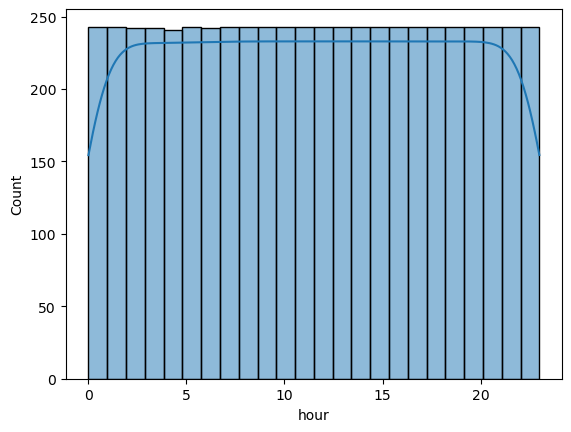

In [88]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.histplot(x = 'hour',data = data ,bins = 24,  kde = True)
#sns.histplot(x = 'PM10',data = data ,bins = 8,  kde = True)
#sns.histplot(x = 'PM2.5',data = data ,bins = 24,  kde = True)
#sns.histplot(x = 'count',data = data ,bins = 24,  kde = True)


위 정보로 부터 파악한 내용 정리
- 데이터의 '시간' 열은 5827개 row로 구성되어있으며 결측치는 없음
- 0시 및 일부 중간시간대 데이터가 비어있음

#### 2) Feature2 : temperature

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 온도


In [89]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['temperature'].info()
# 수치형

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: temperature
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


변수가 수치형인지 범주형인지
- 기온은 수치형? 범주형?

In [90]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['temperature'].isna().sum()


0

변수의 결측치 존재 여부 및 조치방안

In [135]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['temperature'].describe()
#data['temperature'].mode()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

변수의 기초 통계량 확인

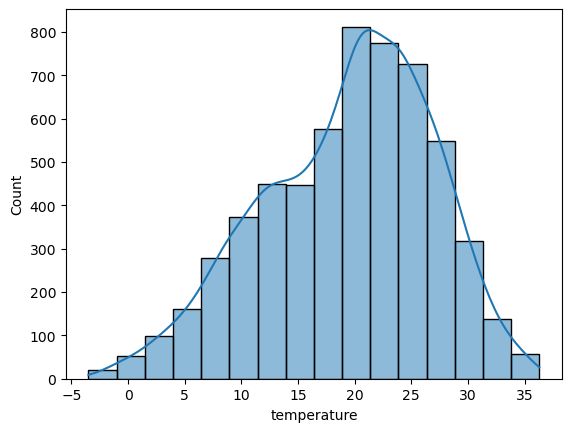

In [134]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.histplot(data['temperature'],bins=16,kde= True)
plt.show()

변수의 분포 확인

In [ ]:
"""
온도는 결측치 없고 평균온도가 19도이다
온도가 높은 날이 많은걸로 봐서 더운시점에서 추운시점으로 넘어가는 계절일듯
20~25도가 가장 많은 걸로 봐서 봄이랑 가을을 거친다
너무 더운날은 자전거 안탐?
"""

위 정보로 부터 파악한 내용 정리


#### 3) Feature3 : precipitation

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 강우 여부 (비가 안왔으면 0, 왔으면 1)

In [109]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['precipitation'].info()
data['precipitation']
#범주형

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: precipitation
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


0       0
1       0
2       0
3       0
4       0
       ..
5822    0
5823    0
5824    0
5825    0
5826    0
Name: precipitation, Length: 5827, dtype: int64

변수가 수치형인지 범주형인지
- 1시간 전 강우 유무는 범주형? 수치형?

In [96]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['precipitation'].isna().sum()


0

변수의 결측치 존재 여부 및 조치 방안


In [106]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
#data['precipitation'].describe()
display(data['precipitation'].value_counts())
display(data['precipitation'].value_counts(normalize=True))

precipitation
0    5387
1     440
Name: count, dtype: int64

precipitation
0    0.924489
1    0.075511
Name: proportion, dtype: float64

변수의 기초 통계량 확인

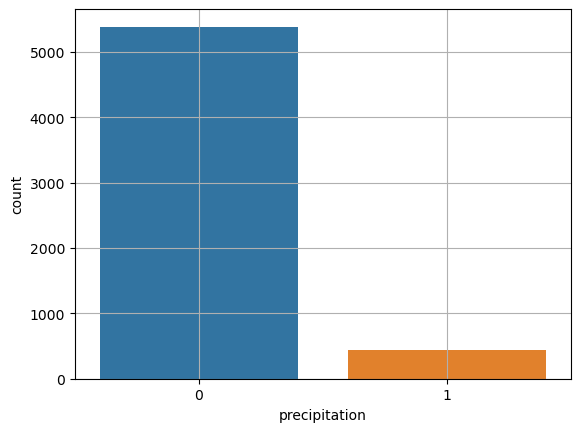

In [108]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.countplot(x='precipitation', data = data)
plt.grid()
plt.show()

변수의 분포 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
"""
비가 안온날이 월등히 많으며 결측값 없음
"""

위 정보로 부터 파악한 내용 정리


#### 4) Feature4 : windspeed

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 풍속, 풍량

In [110]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['windspeed'].info()
#수치형

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: windspeed
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


변수가 수치형인지 범주형인지


In [111]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['windspeed'].isna().sum()

0

변수의 결측치 존재 여부 및 조치방안

In [133]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['windspeed'].describe()
#data['windspeed'].mode()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

변수의 기초 통계량 확인

<Axes: xlabel='windspeed', ylabel='Count'>

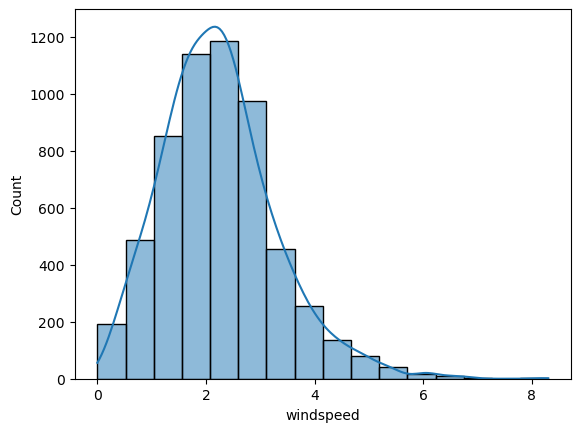

In [116]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.histplot(x= data['windspeed'], bins=16,kde=True)


변수의 분포 확인

In [144]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
"""
평균은 2.23, 중앙값 : 2.2, 최빈값 : 2.3
풍속이 낮은경우가 많으며 그래프가 정규분포를 따름. 이상치 존재 가능 
풍속이 자전거에 영향 미칠까 
풍속 심하면 자전거 안탐
"""

'\n평균은 2.23, 중앙값 : 2.2, 최빈값 : 2.3\n풍속이 낮은경우가 많으며 그래프가 정규분포를 따름. 이상치 존재 가능 \n풍속이 자전거에 영향 미칠까 \n'

위 정보로 부터 파악한 내용 정리


#### 5) Feature5 : humidity

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 습도

In [119]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['humidity'].info()
#수치형

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: humidity
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


변수가 수치형인지 범주형인지


In [121]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['humidity'].isna().sum()

0

변수의 결측치 존재 여부 및 조치방안

In [125]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['humidity'].describe()
#data['humidity'].mode()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

변수의 기초 통계량 확인

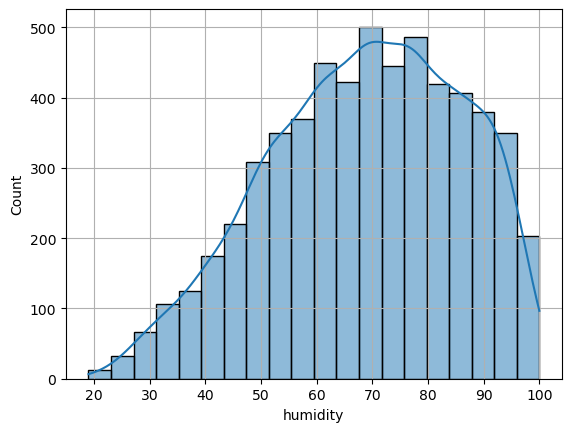

In [123]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.histplot(data['humidity'],bins= 20, kde = True)
plt.grid()
plt.show()

변수의 분포 확인

In [145]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
"""
습도가 대체로 높은 날이 많다. 여름..?
평균 습도 68이며 중앙값 70 최빈값 70
습도랑 자전거랑 연관성
습도가 높으면 더위 심하게 느낌-> 대여량 적을듯
"""

'\n습도가 대체로 높은 날이 많다. 여름..?\n평균 습도 68이며 중앙값 70 최빈값 70\n습도랑 자전거랑 연관성..?\n'

위 정보로 부터 파악한 내용 정리


#### 6) Feature6 : visibility

변수가 내포하고 있는 의미
- 대여 시점의 시계 (시정 거리)

In [136]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['visibility'].info()
#수치형

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: visibility
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


변수가 수치형인지 범주형인지

In [138]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['visibility'].isna().sum()


0

변수의 결측치 존재 여부 및 조치방안

In [143]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['visibility'].describe()
data['visibility'].mode()

0    2000
Name: visibility, dtype: int64

변수의 기초 통계량 확인

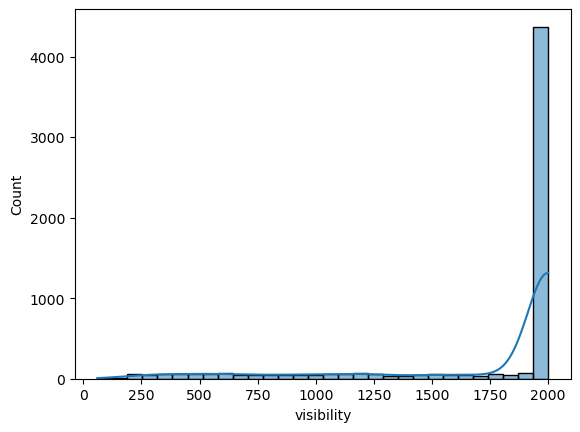

In [142]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.histplot(data['visibility'], bins = 30, kde= True)
plt.show()

변수의 분포 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
"""
데이터가 정규분포를 따르지 않음, 한곳에 몰려있음
평균 1758, 중앙값 2000,최빈값 2000
가시성이 높다 = 날씨가 맑다, 사용량 많을거다
"""

위 정보로 부터 파악한 내용 정리


#### 7) Feature7 : ozone

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 오존 수치

In [146]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['ozone'].info()
# 수치형

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: ozone
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


변수가 수치형인지 범주형인지


In [147]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['ozone'].isna().sum()


0

변수의 결측치 존재 여부 및 조치방안

In [148]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data['ozone'].fillna(method='ffill')
#시계열 데이터임으로 , 이전 값들로 결측값 처리

0       0.002
1       0.003
2       0.023
3       0.028
4       0.008
        ...  
5822    0.002
5823    0.002
5824    0.002
5825    0.001
5826    0.004
Name: ozone, Length: 5827, dtype: float64

만약 결측치가 존재한다면?-> 어떻게 처리할 것인가?

In [155]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['ozone'].describe()
data['ozone'].mode()

0    0.002
Name: ozone, dtype: float64

변수의 기초 통계량 확인

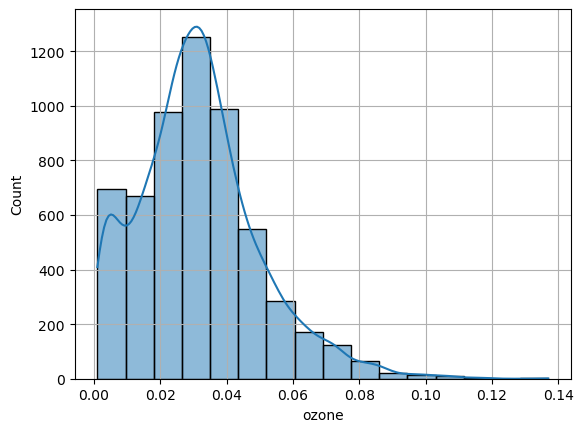

In [153]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.histplot(data['ozone'],bins=16,kde=True)
plt.grid()
plt.show()

변수의 분포 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
"""
평균 0.03, 중앙값 0.03, 최빈값 0.002 
오존 발생 쉬운 조건 : 기온 25도 이상, 습도 75% 이하, 맑은 날씨, 약풍일때 
오존은 보통 낮에 높으며 -> 높은시간에는 자전거 안탄다?
"""


위 정보로 부터 파악한 내용 정리


#### 8) Feature8 : PM10

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 미세먼지 농도

In [156]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['PM10'].info()
#수치

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM10
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


변수가 수치형인지 범주형인지


In [157]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['PM10'].isna().sum()

0

변수의 결측치 존재 여부 및 조치방안

In [162]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['PM10'].describe()
data['PM10'].mode()

0    22.0
Name: PM10, dtype: float64

변수의 기초 통계량 확인

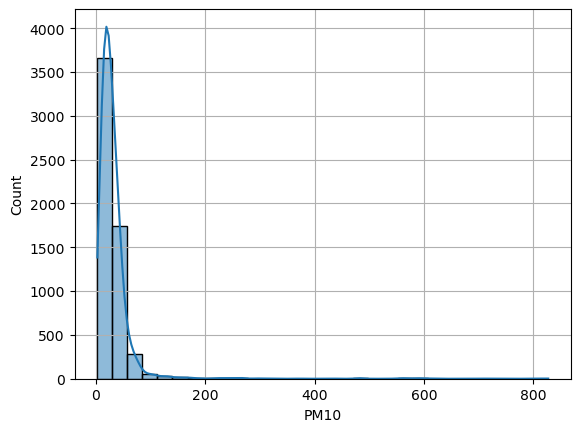

In [161]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.histplot(data['PM10'],bins = 30, kde =True)
plt.grid()
plt.show()

변수의 분포 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
"""
평균 31, 중앙값 25 ,최반값 22
보통 미세먼지 농도가 30까지는 좋음, 30~ 80 은 보통, 80~ 150 은 나쁨, 150~ 매우나쁨이다
또한 미세먼지 농도는 봄과 겨울에 비교적 높게 나옴
미세먼지 농도가 높은 봄은 주로 황사,겨울은 난방 + 찬공기
여름에는 비가 와서 농도 낮아짐 + 강한 태양광
미세먼지와 날씨 관계
"""

위 정보로 부터 파악한 내용 정리


#### 9) Feature9 : PM2.5

변수가 내포하고 있는 의미
- 따릉이 대여시점의 초미세먼지 수치

In [163]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['PM2.5'].info()
#수치형

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM2.5
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


변수가 수치형인지 범주형인지


In [164]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['PM2.5'].isna().sum()

0

변수의 결측치 존재 여부 및 조치방안

In [169]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['PM2.5'].describe()
#data['PM2.5'].mode()

count    5827.000000
mean       15.574738
std        13.803686
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

변수의 기초 통계량 확인

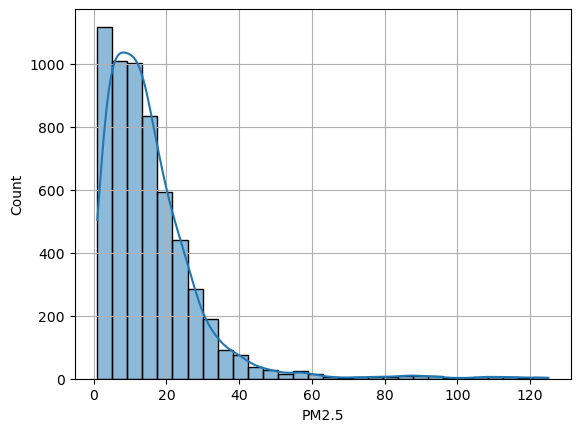

In [167]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.histplot(data['PM2.5'],bins= 30, kde= True)
plt.grid()
plt.show()

변수의 분포 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
"""
평균: 15, 중앙값 : 13, 최빈값 : 4
0~15 : 좋음, ~35 : 보통, ~75 : 나쁨, 76~ : 매우 나쁨
초미세먼지 또한 미세먼지와 같음
초미세먼지와 미세먼지가 강한 날은 외출 안함
"""

위 정보로 부터 파악한 내용 정리


#### 10) Count (Target)

In [171]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['count'].info()
#수치형

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: count
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


변수가 내포하고 있는 의미
- 따릉이의 대여량 -> 우리가 예측해야 할 변수!

In [173]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['count'].isna().sum()

0

변수가 수치형인지 범주형인지


변수의 결측치 존재 여부 및 조치 방안

In [174]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data['count'].describe()


count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64

변수의 기초 통계량 확인

<Axes: xlabel='count', ylabel='Count'>

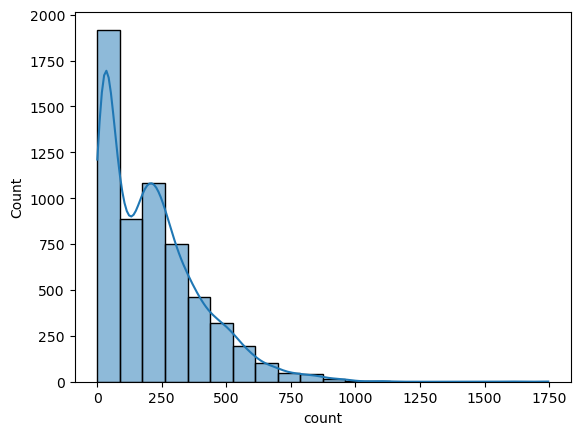

In [175]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.histplot(data['count'], bins=20, kde =True)


변수의 분포 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
"""
자전거 대여 -> 시간대
자전거 대여 -> 계절 
자전거 대여 -> 미세먼지,초미세먼지
자전거 대여 -> 오존 
자전거 대여 -> 풍속
자전거 대여 -> 강수 여부
자전거 대여 -> 온도
자전거 대여 -> 습도
"""

위 정보로 부터 파악한 내용 정리
